# PACMAN
#### A Hubble Reduction Pipeline for Exoplanet Atmospheres
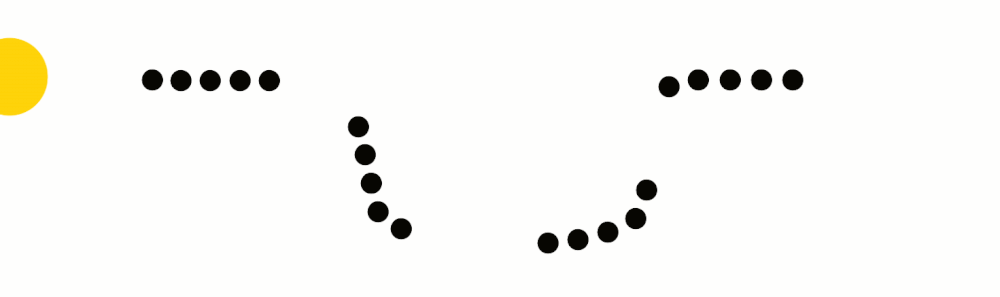

[Animation Credit](https://pacmandocs.readthedocs.io/en/latest/index.html)

## Introduction
Characterizing planetary atmospheres is at the forefront of exoplanet research. The primary method in atmospheric characterization relies on detecting absorption by the atmosphere of the planet as it passes in front of its host, described in the visual below:

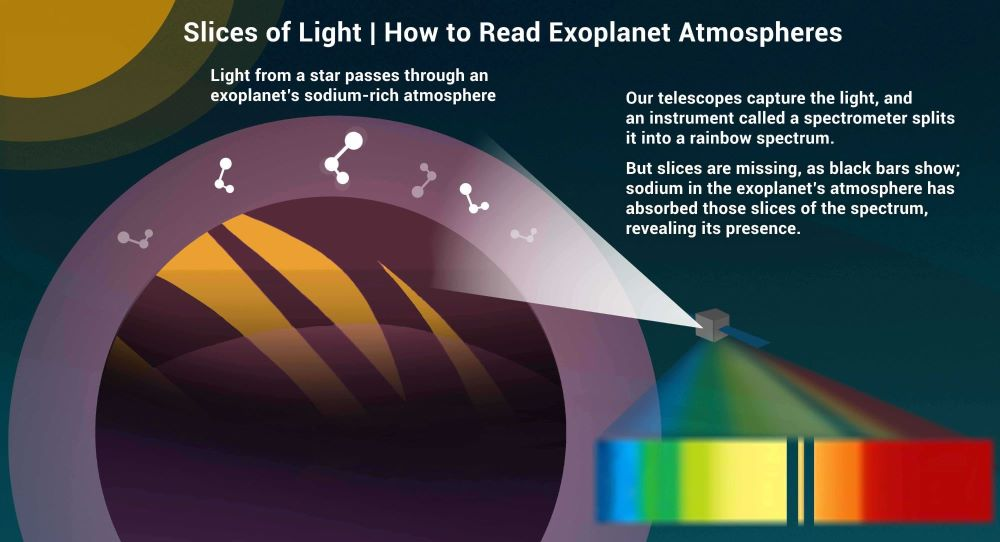

 Depsite how faint these signals are, strides in the development of robust and efficient data reduction pipelines have bolstered research efforts in our continued understanding of these objects. This lesson will guide you through the Python module PACMAN ([Zieba & Kreidberg (2022)](https://ui.adsabs.harvard.edu/abs/2022JOSS....7.4838Z/abstract)) providing descriptions of each step, what input you need to provide to the pipeline, and an example to reduce your own data to a spectroscopic light curve!

 ## Installation
 Installation instructions can be found [here](https://pacmandocs.readthedocs.io/en/latest/installation.html). It is advised you create your own **conda environment** for this installation. This can be done and run below **in your terminal** (bash for Mac/Linux, Powershell on Windows, or in your Python IDE). **NOTE: PACMAN is run exclusively through terminal commands. Thus, all code shown here should be run in your terminal environment. If you need guidance on how to navigate your terminal environment, [this](https://realpython.com/terminal-commands/) is a great resource that covers all OS.**

In [ ]:
conda create -n pacman python==3.9
conda activate pacman
git clone -b v0.4.0 https://github.com/sebastian-zieba/PACMAN
cd PACMAN
pip install -e .

This should leave you in the PACMAN directory. If you already have PACMAN installed and want to update it, you can run the following:

In [ ]:
git pull
pip install --upgrade --force-reinstall .

If you want to perform alternative installations (i.e. pip and Git) or perform a test (recommended!), reference the installation page at the beginning of this section.

## Preparing Your *Data* and *Run* Directories
PACMAN utilizes two directories: a *run* directory and a *data* directory. The *run* directory is where PACMAN will **perform all of its data reduction and output results**. You can think of this as a sort of **workbench**. The *data* directory is where all of your unprocessed image files (.ima) are. This can be thought of as a sort of **storage box**. 

All you need to put in your *data* directory are the images files you will download in the next section. For the run directory, you will need to download three files: *pacman_script.py*, *fit_par.txt*, and *obs_par.pcf*, which will be explained a bit further down. You can find the three files [here](https://downgit.github.io/#/home?url=https:%2F%2Fgithub.com%2Fsebastian-zieba%2FPACMAN%2Ftree%2Fmaster%2Fsrc%2Fpacman%2Fdata%2Frun_files) (A download will start in your browser!) If you want more clarity or **examples** on how to **set up your directories**, check this tutorial [here](https://pacmandocs.readthedocs.io/en/latest/before_running.html).

## Accessing and Downloading Data

There are two primary ways to **download Hubble data**: programatically via *astroquery*, and through browser via the MAST portal. The PACMAN documentation has a great [tutorial](https://pacmandocs.readthedocs.io/en/latest/astroquery_visits.html) on how to fetch data via *astroquery*. In this tutorial, we will download the data via MAST, to offer an alternative way to access data.

### [MAST Archive's Hubble Search](https://mast.stsci.edu/search/ui/#/hst)

MAST has employed a specialzed search portal for Hubble and JWST data that gives the user great control of the data sets they search for. We will analyze data from GJ1214 b, a Neptune-like planet orbiting an M dwarf star only 47.5 light years away. Read about it [here](https://en.wikipedia.org/wiki/GJ_1214)!

This query will look at two observations between March 13th and Marth 15th, 2013. To begin, enter "GJ1214" in the "Object name(s) and/or RA and Dec" field. Then, enter "13021" for the "Proposal ID associated with observation." Lastly, enter "2023-03-13" and "2023-03-15" in the "Find data observed on or between these dates" fields, leaving the time fields blank. **Do not change any other fields from their default**. This is what your query should look like:

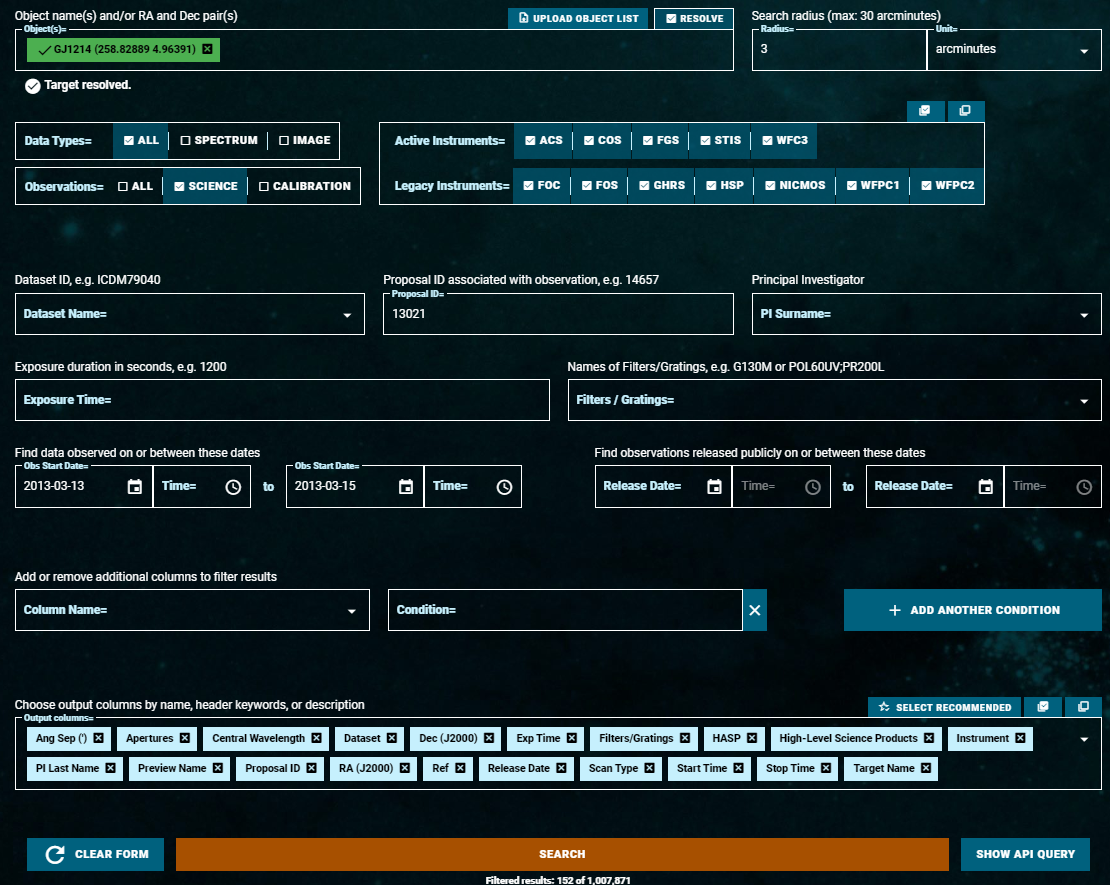

This should lead you to a long list of files with many columns of metadata, like shown below:

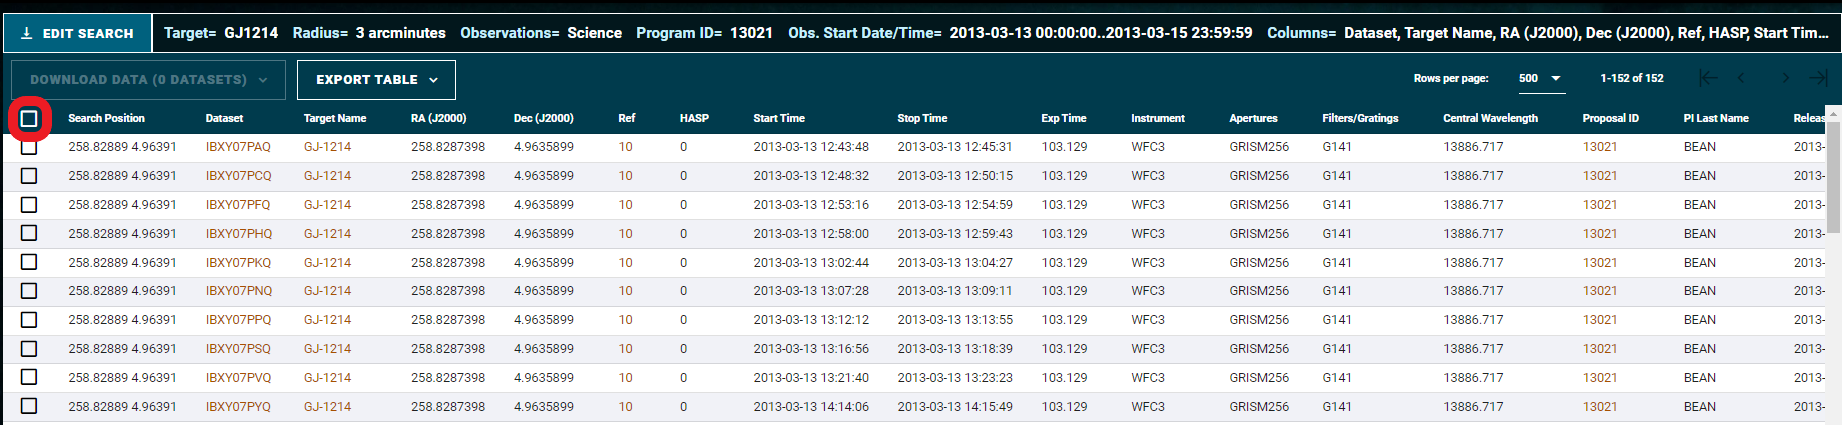

From here, you will want to select all of the files by clicking the box outlined in red in the image above. Once selected, click "Download Data" and the "Choose Files" option. This will take you to a new menu, where you will select the data products you want. Under the "Calibrated" category, select the "IMA" files, as such:

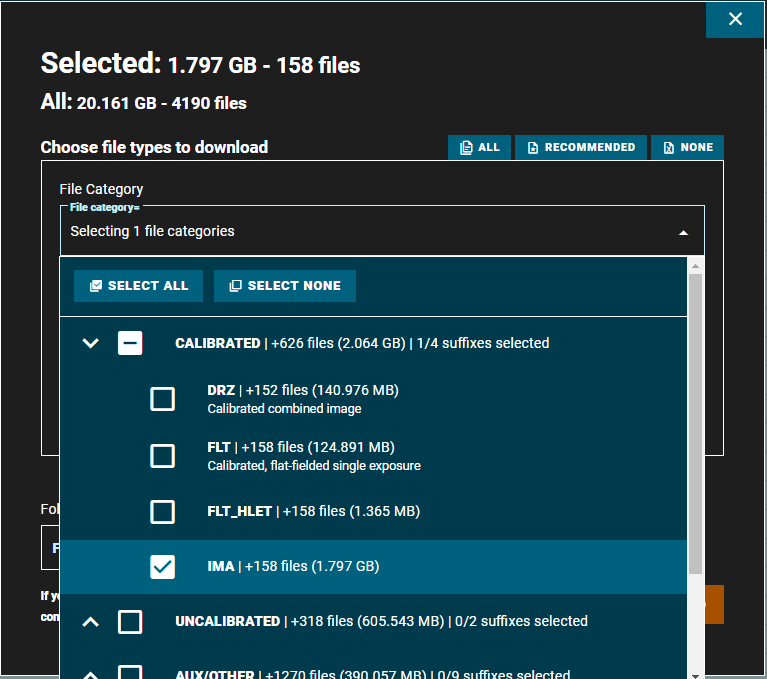

Lastly, select "FLAT" under "File Structure," as this will make moving the data to the right directory much easier! 

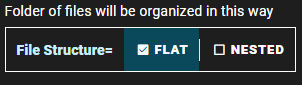

**ONLY SELECT THE IMA FILES**. All other files are unncessary, and some can be quite large! PACMAN will download all ancillary files needed automatically. Click download, and you should get a .zip file. Once you do, all you have to do is unzip your files in your data directory, and you are finished downloading the data!


## Preparing the PCF File

As mentioned before, you will want the *pacman_script.py*, *obs_par.pcf*, and *fit_par.txt* in your "run" directory. The Python file is simply the executable you will continually run with different flags to reduce the data. The .pcf file contains all relevant information pertaining to your specific data set! This is where most user-input is required. While much of the file does not need adjustment in this case, this tutorial will explain each stage so that you can apply PACMAN more efficiently for future targets.

### Stage 00 and Stage 02
The lines for Stage 00 and 02 in the PCF file look like:

In [ ]:
# 00
rundir                       /home/zieba/Desktop/Projects/Observations/Hubble/GJ1214_13021 # location of run dir
datadir                      /home/zieba/Desktop/Data/GJ1214_Hubble13021        # location of data dir
suffix                       ima                                                # data suffix (only ima supported right now)
which_visits                 everything                                          # which visits to use; Options: list (e.g., [0,1,3]) or everything

save_obs_times_plot          True
show_obs_times_plot          False

## 02 barycorr
save_barycorr_plot           True                                               # save a plot with locations of HST?
show_barycorr_plot           False

These are mostly self explanatory, with the first two lines being your *run* and *data* directories mentioned before. The image suffix will necessarily be .ima for this use case. The "which_visits" will usually be "everything"; however, the numbering corresponds to the temporal order of individual visits within the data directory (e.g. [0] is the first visit in the data directory, [1] is the second). You will want to save the observation and barycenter correction plots to troubleshoot potential issues, and you can optionally tell Python to show either as they are produced.

<!-- ***What does Stage 01 do?***

This stage compiles important location and temporal information about the observation (in something called a **Horizons file**, check it out [here](https://ssd.jpl.nasa.gov/horizons/)). PACMAN compiles this information automatically from the image **metadata** (sound familiar?). The Hubble Space Telescope orbits the Earth, so its motion through space is like a weaving line! Due to special relativity, this necessarily has an effect on the time of measurement, so care must be taken to take this into account when reporting the timestamp of an image. Additionally, observations on a given target happen in *orbits*, usually lasting about an hour each pass, which will explain any gap you might see in real data sets you anaylze. -->

### Stage 03

The lines for Stage 03 in the PCF file look like:

In [ ]:
## 03
Teff                         3250                                               # effective temperature of the star
logg                         5.026                                              # surface gravity of the star
MH                           0.29                                               # metallicity of the star
sm                           k93models                                          # stellar model. Options: blackbody, k93models, ck04models or phoenix

smooth                       True                                               # smooth stellar spectrum using a gaussian kernel
smooth_sigma                 441

save_smooth_plot             True
show_smooth_plot             False

save_refspec_plot            True                                               # save a plot showing the stellar model, bandpass and the product of them?
show_refspec_plot            False

The first four lines correspond to the **stellar parameters of your planet's host star**. In this case, the values are filled in for you, but it is an important exercise to be able to find these yourself. This can be done, for example, by using the [NASA Exoplanet Archive Planetary Systems Catalog](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). Simply type in the planet name (GJ 1214 b) and find the corresponding $T_{eff}$, $\log(g)$ and metallicty of the star. While the values above are close, they are not the best! More refined values include $T_{eff} = 3170; \; \log(g) = 4.944 ; \; MH = 0.29$. Feel free to keep the default, or change to these values. 

The "sm" parameter is the stellar model. If you choose any model other than "blackbody," you will need to supply the log(g) and metallicity parameters, but these are typically readily available. The "smooth" and "smooth_sigma" parameters discusses how the spectrum model are treated, and typically this should not be adjusted until a good reason not to arises. As with the other plot options, determine whether or not you want to save/see the spectrum smoothing plots and/or the reference spectrum plots.